# 导入包

In [1]:
#
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# 训练集
## 数据探索

In [3]:
org_data=pd.read_csv("train.csv")
org_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [204]:
org_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [205]:
org_data["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [219]:
org_data[(org_data["StateHoliday"]!=0)&(org_data["StateHoliday"]!="0")].count()

Store            31050
DayOfWeek        31050
Date             31050
Sales            31050
Customers        31050
Open             31050
Promo            31050
StateHoliday     31050
SchoolHoliday    31050
dtype: int64

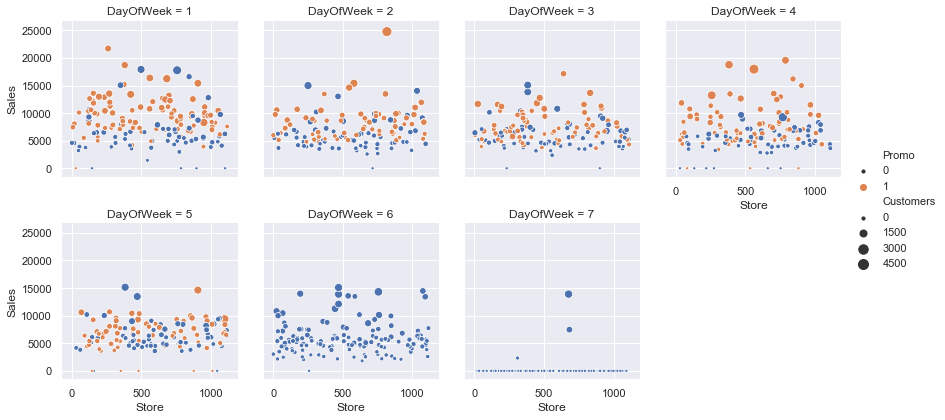

In [203]:
sns.relplot(x="Store", y="Sales", hue="Promo",size="Customers",col="DayOfWeek",sizes=(10,100),col_wrap=4,height=3,data=org_data.sample(frac=0.001,random_state=1))

In [44]:
sales_data=org_data["Sales"].copy(deep=True)
#sales_data.sort_values(inplace=True)
#sales_data.head(100) 
#pd.cut(sales_data,10000,precision=0)

In [236]:
test_data=pd.read_csv("test.csv")
test_data.head(n=10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


# 测试集

In [235]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [227]:
test_data["Open"].unique()

array([ 1., nan,  0.])

In [247]:
test_data[test_data["Open"].isnull()].count()

Id               11
Store            11
DayOfWeek        11
Date             11
Open              0
Promo            11
StateHoliday     11
SchoolHoliday    11
dtype: int64

---
---

In [40]:
pp=np.array([0,1,2,3,4,5,6]) 
pdd=pd.cut(pp,3,precision=0)
pdd

[(-0.01, 2.0], (-0.01, 2.0], (-0.01, 2.0], (2.0, 4.0], (2.0, 4.0], (4.0, 6.0], (4.0, 6.0]]
Categories (3, interval[float64]): [(-0.01, 2.0] < (2.0, 4.0] < (4.0, 6.0]]

In [162]:
  
sexs=[]
for sex in list(range(30)):
    sexs.append(np.random.choice([1,3,5]))


data2 = {"bill":np.random.randint(100,1000,size=30),"tip":np.random.randint(10,100,size=30),"sex":sexs,"res":np.random.randint(0,2,size=30)}
pddata2=pd.DataFrame(data2)

pddata2

,bill,tip,sex,res
0,631,28,3,0
1,948,56,5,0
2,197,38,3,0
3,487,42,1,0
4,547,22,1,0
5,160,29,3,1
6,934,91,1,0
7,835,23,1,0
8,604,43,3,0
9,559,44,3,1


In [154]:
data2 = {"bill":np.random.randint(100,1000,size=30),"tip":np.random.randint(10,100,size=30),"sex":np.random.randint(1,6,size=30),"res":np.random.randint(0,2,size=30)}
pddata2=pd.DataFrame(data2)

pddata2

,bill,tip,sex,res
0,938,67,1,0
1,812,54,2,0
2,926,18,4,0
3,484,49,1,0
4,429,83,2,0
5,297,93,1,1
6,550,38,1,1
7,368,49,5,1
8,940,80,4,0
9,170,14,4,1


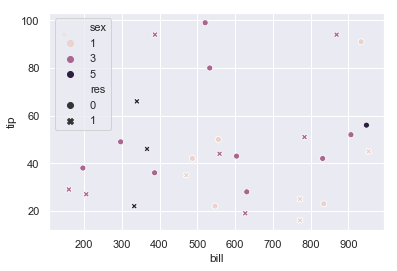

In [169]:
sns.scatterplot(x="bill", y="tip", hue="sex",style="res",legend="full",data=pddata2)

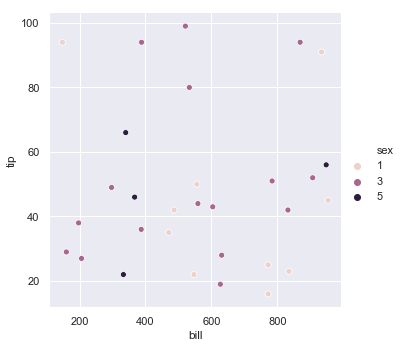

In [186]:
sns.relplot(x="bill", y="tip",hue="sex",legend="full",data=pddata2)